In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = "C:/Users/apsam/Documents/work/Thiyaku work/blog_urban_growth"

csv_file = f"{data_dir}/cbe_extracted_1.csv"
model_path = f"{data_dir}/random_forest_model_cbe_1.pkl"

In [3]:
df = pd.read_csv(csv_file)

In [4]:
df = df[df.Value != -99]

In [5]:
df = df.pivot_table(index=['Date', "x", "y", 'Land Use'], columns='Band', values='Value').reset_index()
df.columns.name = None

In [6]:
set(df["Land Use"])

{'barren_land', 'settelements', 'vegetation', 'water_bodies'}

In [7]:
df.head()

,Date,x,y,Land Use,B1,B10,B11,B12,B13,B2,B3,B4,B5,B6,B7,B8,B9
0,20161225T051222_20161225T051551_T43PGN,704675.0,1208535.0,barren_land,0.1601,0.0788,0.0031,0.3568,0.3026,0.1339,0.1301,0.1784,0.2039,0.2476,0.2756,0.2635,0.2908
1,20161225T051222_20161225T051551_T43PGN,704675.0,1208545.0,barren_land,0.1601,0.0788,0.0031,0.3542,0.2951,0.1335,0.1311,0.1766,0.2047,0.2468,0.2756,0.2625,0.2912
2,20161225T051222_20161225T051551_T43PGN,704675.0,1208555.0,barren_land,0.1601,0.0788,0.0031,0.3542,0.2951,0.1319,0.1317,0.1762,0.2047,0.2468,0.2756,0.2602,0.2912
3,20161225T051222_20161225T051551_T43PGN,704675.0,1208565.0,barren_land,0.1601,0.0788,0.0031,0.3260,0.2590,0.1326,0.1299,0.1747,0.1825,0.2318,0.2568,0.2580,0.2740
4,20161225T051222_20161225T051551_T43PGN,704675.0,1208575.0,barren_land,0.1601,0.0788,0.0031,0.3260,0.2590,0.1285,0.1221,0.1500,0.1825,0.2318,0.2568,0.2335,0.2740


In [8]:
df.shape

(176716, 17)

In [9]:
df["Land Use"]

0         barren_land
1         barren_land
2         barren_land
3         barren_land
4         barren_land
             ...     
176711    barren_land
176712    barren_land
176713    barren_land
176714    barren_land
176715    barren_land
Name: Land Use, Length: 176716, dtype: object

In [10]:
df = df.dropna()

In [11]:
# df = df[~np.isinf(df.B1_B3_ratio)]
# df.head()

In [12]:
# Relabel non-settlement classes as "other"
# df['Land Use'] = df['Land Use'].apply(lambda x: 'settelements' if x == 'settelements' else 'other')
# 

In [13]:
#df = df[~((df["Land Use"] == "settelements") & (df.B1 < 50) & (df.B2 < 50) & (df.B3 < 50))]

In [14]:
# filtered_data = df[df['Land Use'] == 'settelements']
# filtered_data.head(100)

In [15]:
df.head()

,Date,x,y,Land Use,B1,B10,B11,B12,B13,B2,B3,B4,B5,B6,B7,B8,B9
0,20161225T051222_20161225T051551_T43PGN,704675.0,1208535.0,barren_land,0.1601,0.0788,0.0031,0.3568,0.3026,0.1339,0.1301,0.1784,0.2039,0.2476,0.2756,0.2635,0.2908
1,20161225T051222_20161225T051551_T43PGN,704675.0,1208545.0,barren_land,0.1601,0.0788,0.0031,0.3542,0.2951,0.1335,0.1311,0.1766,0.2047,0.2468,0.2756,0.2625,0.2912
2,20161225T051222_20161225T051551_T43PGN,704675.0,1208555.0,barren_land,0.1601,0.0788,0.0031,0.3542,0.2951,0.1319,0.1317,0.1762,0.2047,0.2468,0.2756,0.2602,0.2912
3,20161225T051222_20161225T051551_T43PGN,704675.0,1208565.0,barren_land,0.1601,0.0788,0.0031,0.3260,0.2590,0.1326,0.1299,0.1747,0.1825,0.2318,0.2568,0.2580,0.2740
4,20161225T051222_20161225T051551_T43PGN,704675.0,1208575.0,barren_land,0.1601,0.0788,0.0031,0.3260,0.2590,0.1285,0.1221,0.1500,0.1825,0.2318,0.2568,0.2335,0.2740


In [16]:
# Preparing data for training
# Select features (B1, B2, B3) and target (Land Use)
X = df[['B1', 'B2', 'B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13']]
y = df['Land Use']

In [17]:

from sklearn.preprocessing import StandardScaler


# Encoding the target variable
y_encoded, class_labels = pd.factorize(df['Land Use'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Standardizing the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
print(rf.classes_)  # Shows the mapping of each numeric class to the original labels

# Making predictions
y_pred = rf.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_labels)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


[0 1 2 3]
Accuracy: 0.9965104215787984
Classification Report:
               precision    recall  f1-score   support

 barren_land       1.00      1.00      1.00     24706
  vegetation       1.00      0.99      0.99      2673
settelements       1.00      1.00      1.00     21649
water_bodies       1.00      1.00      1.00      3987

    accuracy                           1.00     53015
   macro avg       1.00      1.00      1.00     53015
weighted avg       1.00      1.00      1.00     53015



In [18]:
for i, class_name in enumerate(class_labels):
    print(f"Encoded value {i}: {class_name}")

Encoded value 0: barren_land
Encoded value 1: vegetation
Encoded value 2: settelements
Encoded value 3: water_bodies


In [ ]:
import pickle

# Assuming rf is your trained Random Forest model
with open(model_path, "wb") as f:
    pickle.dump(rf, f)

In [ ]:
# Displaying the confusion matrix with actual labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [25]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# import pandas as pd

# # Encoding the target variable if necessary
# y_encoded, class_labels = pd.factorize(df['Land Use'])

# # Initializing and training the Random Forest model on the entire dataset
# rf_1= RandomForestClassifier(n_estimators=100, random_state=42)
# rf_1.fit(X, y_encoded)

# # Making predictions on the entire dataset (as we are using all data for training)
# y_pred_1 = rf_1.predict(X)

# # Evaluating the model's training accuracy
# accuracy_1 = accuracy_score(y_encoded, y_pred_1)
# report_1 = classification_report(y_encoded, y_pred_1, target_names=class_labels)

# print(f"Training Accuracy: {accuracy_1}")
# print("Classification Report (Training Data):\n", report_1)


In [26]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import LabelEncoder

# # Encoding the target variable if necessary
# y_encoded, class_labels = pd.factorize(df['Land Use'])

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# ### Random Forest with Hyperparameter Tuning ###
# rf = RandomForestClassifier(random_state=42)

# # Hyperparameter grid for Random Forest
# rf_param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # RandomizedSearchCV for Random Forest
# rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
# rf_random.fit(X_train, y_train)

# print(f"Best Random Forest Parameters: {rf_random.best_params_}")

# # Making predictions
# y_pred_rf = rf_random.predict(X_test)

# # Evaluating Random Forest
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# report_rf = classification_report(y_test, y_pred_rf, target_names=class_labels)

# print(f"Random Forest Accuracy: {accuracy_rf}")
# print("Random Forest Classification Report:\n", report_rf)

# ### XGBoost with Hyperparameter Tuning ###
# xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# # Hyperparameter grid for XGBoost
# xgb_param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [3, 5, 7, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1, 0.2]
# }

# # RandomizedSearchCV for XGBoost
# xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
# xgb_random.fit(X_train, y_train)

# print(f"Best XGBoost Parameters: {xgb_random.best_params_}")

# # Making predictions
# y_pred_xgb = xgb_random.predict(X_test)

# # Evaluating XGBoost
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# report_xgb = classification_report(y_test, y_pred_xgb, target_names=class_labels)

# print(f"XGBoost Accuracy: {accuracy_xgb}")
# print("XGBoost Classification Report:\n", report_xgb)

# ### CatBoost with Hyperparameter Tuning ###
# catboost = CatBoostClassifier(random_state=42, silent=True)

# # Hyperparameter grid for CatBoost
# cat_param_grid = {
#     'iterations': [100, 200, 500],
#     'depth': [4, 6, 8, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'l2_leaf_reg': [1, 3, 5, 7]
# }

# # RandomizedSearchCV for CatBoost
# cat_random = RandomizedSearchCV(estimator=catboost, param_distributions=cat_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
# cat_random.fit(X_train, y_train)

# print(f"Best CatBoost Parameters: {cat_random.best_params_}")

# # Making predictions
# y_pred_cat = cat_random.predict(X_test)

# # Evaluating CatBoost
# accuracy_cat = accuracy_score(y_test, y_pred_cat)
# report_cat = classification_report(y_test, y_pred_cat, target_names=class_labels)

# print(f"CatBoost Accuracy: {accuracy_cat}")
# print("CatBoost Classification Report:\n", report_cat)



In [131]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy_svc:.2f}')

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc, target_names=data.target_names))

NameError: name 'y_pred_svc' is not defined

In [20]:
import pickle

# Assuming rf is your trained Random Forest model
with open(model_path, "wb") as f:
    pickle.dump(rf, f)

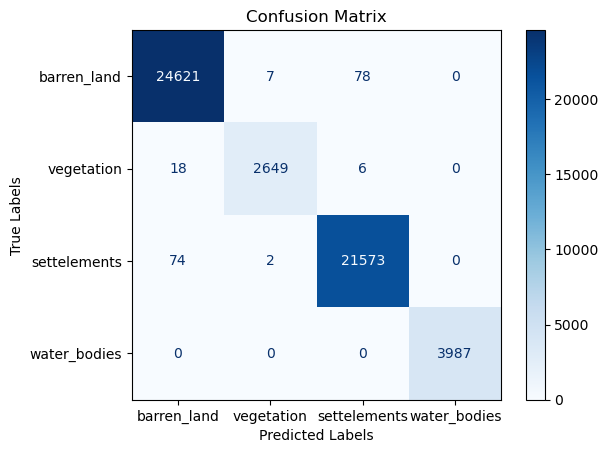

In [19]:
# Displaying the confusion matrix with actual labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

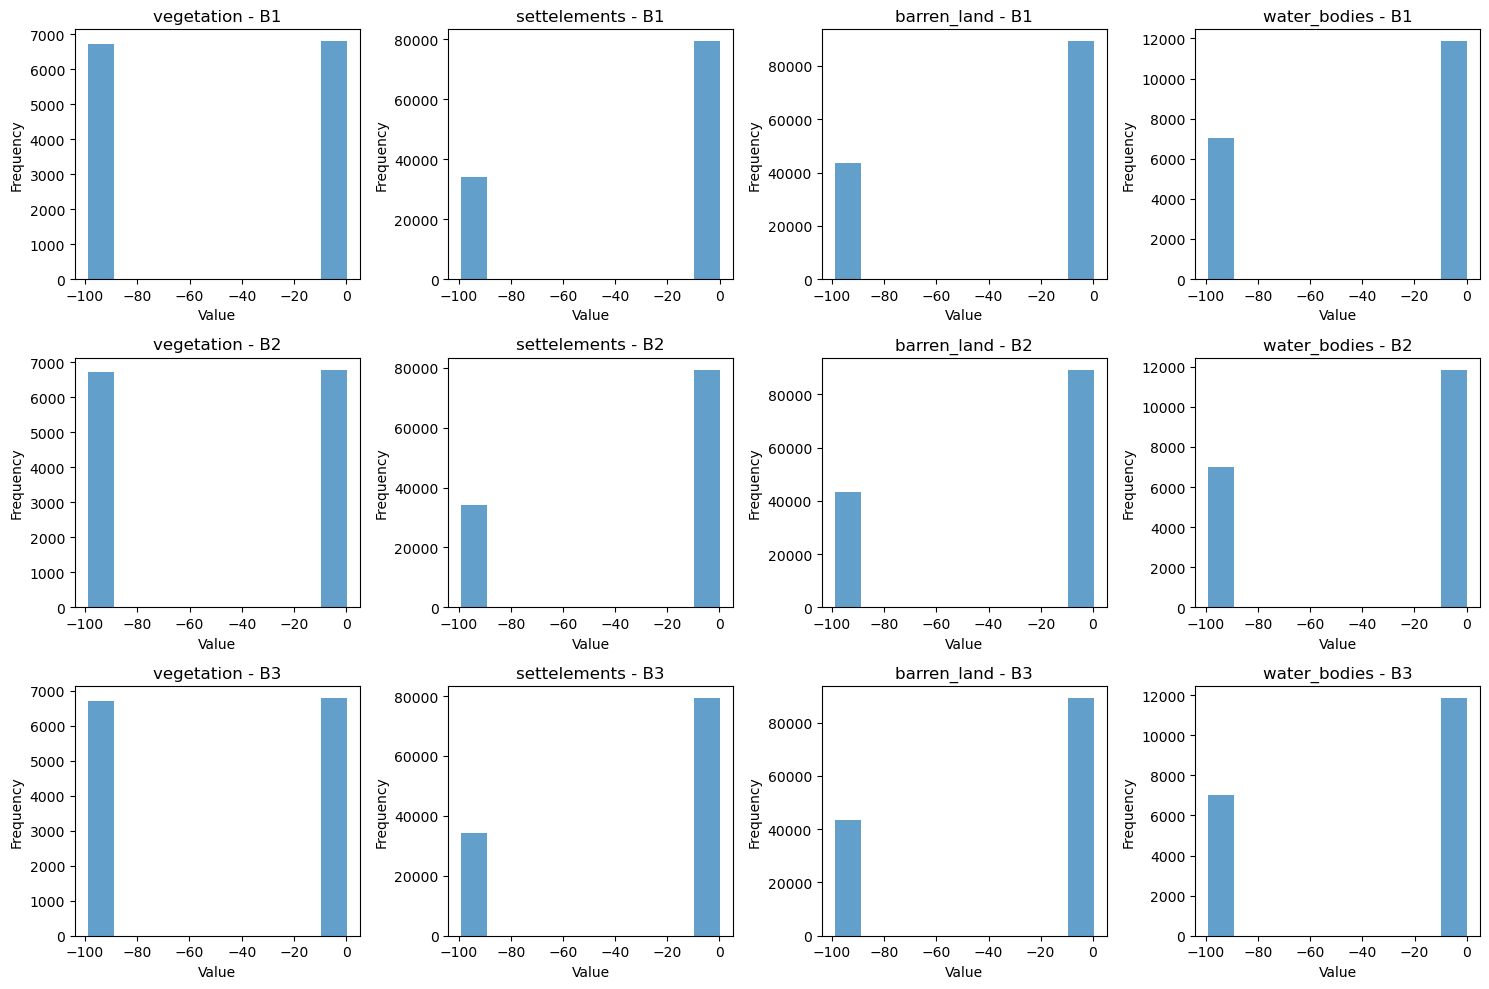

In [57]:
# Plotting histograms
# List of bands to plot
bands = ['B1', 'B2', 'B3']
land_uses = df['Land Use'].unique()

# Plotting histograms
plt.figure(figsize=(15, 10))

for i, band in enumerate(bands, 1):
    for j, land_use in enumerate(land_uses, 1):
        plt.subplot(len(bands), len(land_uses), (i - 1) * len(land_uses) + j)
        subset = df[df['Land Use'] == land_use]
        plt.hist(subset[band].dropna(), bins=10, alpha=0.7)
        plt.title(f'{land_use} - {band}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
y_encoded, class_labels = pd.factorize(df['Land Use'])
print(class_labels) 

Index(['vegetation', 'barren_land', 'water_bodies'], dtype='object')


In [37]:
in_file = "e:/Projects/personal/location_strategy/automation/KB homes/developer_builder_unique_dictionary.csv"

In [39]:
df = pd.read_csv(in_file)

In [44]:
df.Type = df["Type"].str.strip()

In [46]:
df.OwnerName = df["OwnerName"].str.strip()

In [47]:
df.to_csv(in_file, index=False)